# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Image-based Malware Classification using CNN




# Preprocessing - Converting to images

Raw malwares will be stored in the following folder:

In [39]:
root = "../Data/malimg/"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [40]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+ name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

files :  ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.gen!g', 'C2LOP.P', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


# Preprocessing - Generate the dataset

Here is our new folder :

In [41]:
path_root = "../Data/malimg/"


In [42]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)


Found 9348 images belonging to 25 classes.


To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : Will resize all images to the specified size. I personally chose (64*64) images.
  * **batch_size** : Is the size of the batch we will use. 

We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [44]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [45]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [46]:
imgs.shape

(9348, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [47]:
labels.shape

(9348, 25)

In [48]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

The following method allows us to plot a sample of images in our dataset.

In [49]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

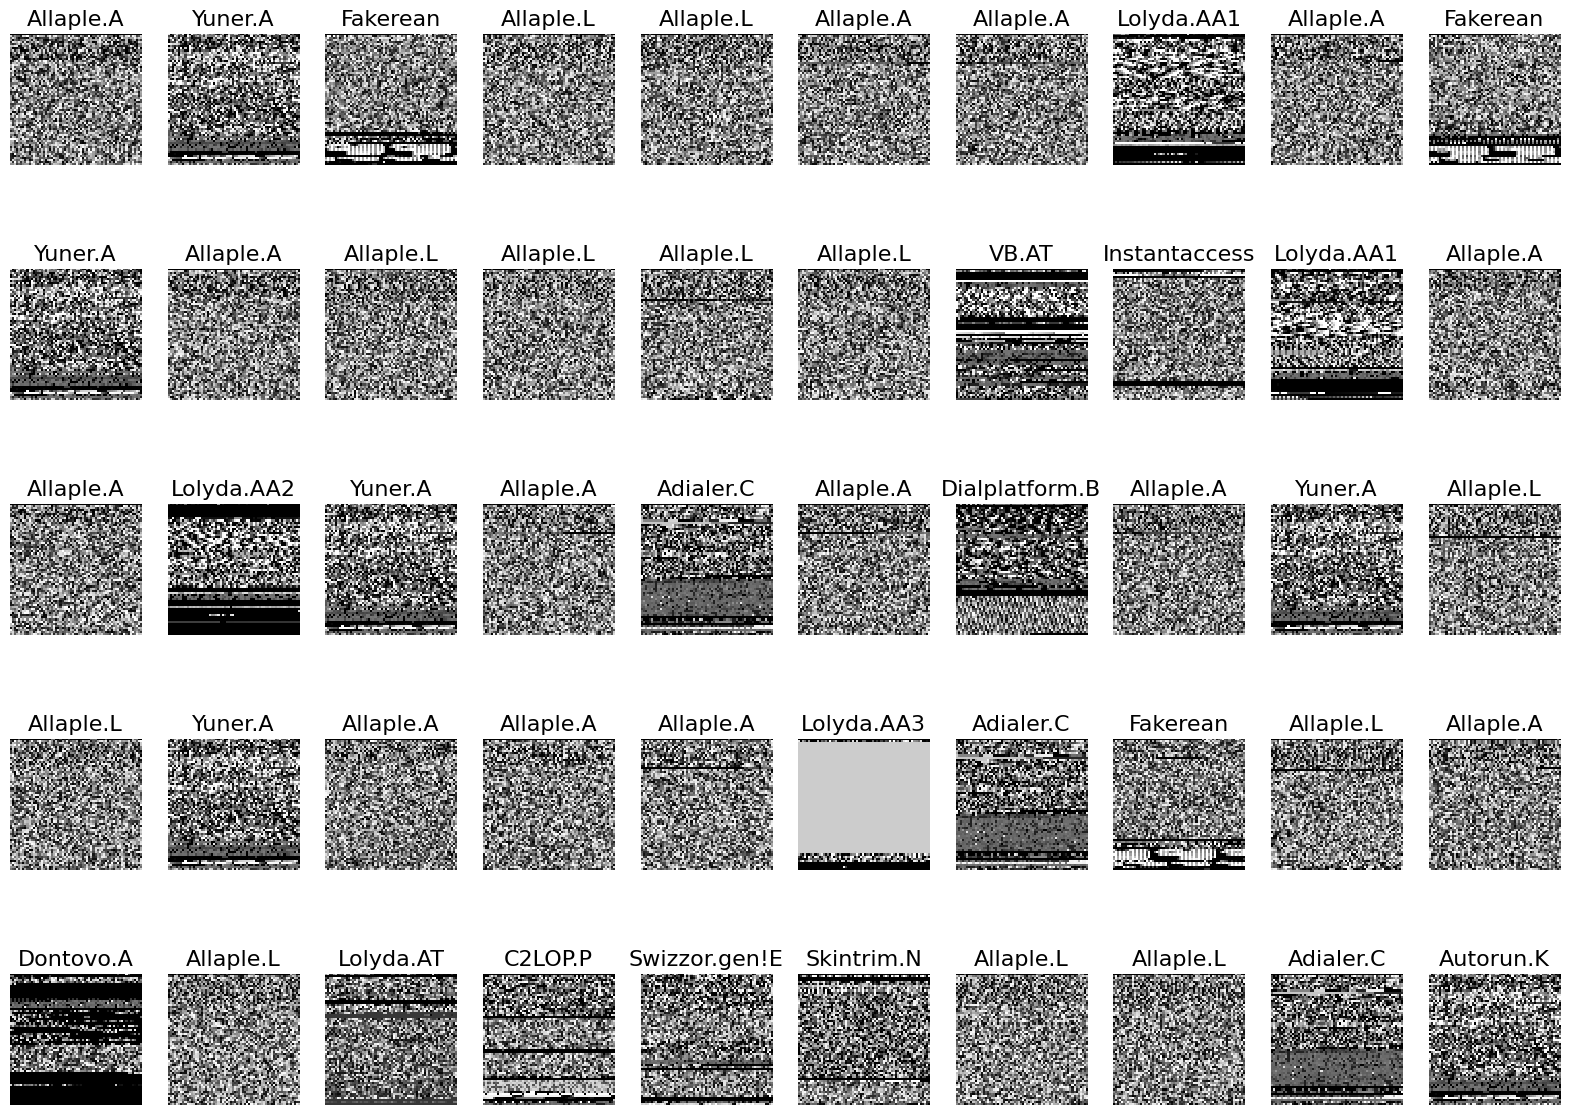

In [50]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse 

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [51]:
classes = batches.class_indices.keys()

In [52]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

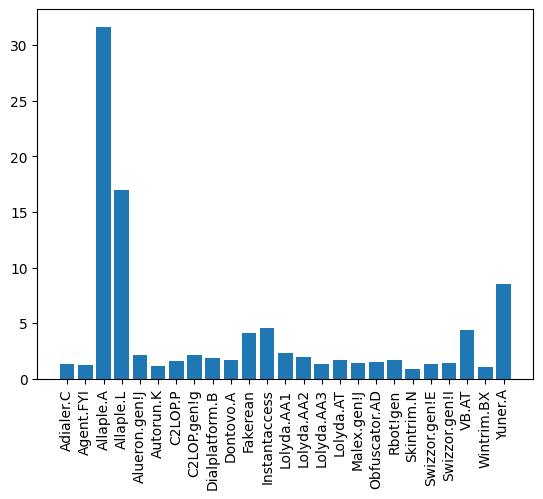

In [53]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !


# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [55]:
X_train.shape

(6543, 64, 64, 3)

In [56]:
X_test.shape

(2805, 64, 64, 3)

In [57]:
y_train.shape

(6543, 25)

In [58]:
y_test.shape

(2805, 25)

## Convolutional Neural Network Model

*Our* **CNN** model using Keras. This model will have the following layers :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [59]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import AUC



We want **25** classes as output.

In [60]:
num_classes = 25

Building the model

In [61]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [62]:
from keras import backend as K

def recall_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_test, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, y_pred):
    precision = precision_m(y_test, y_pred)
    recall = recall_m(y_test, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [63]:
Malware_model = malware_model()

c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
Malware_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2940)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       376,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,078 (1.48 MB)

 Trainable params: 389,078 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
y_train.shape

(6543, 25)



**class_weights** uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. To use this method, y_train must not be one hot encoded.

In [66]:
y_train_new = np.argmax(y_train, axis=1)

In [67]:
y_train_new

array([11, 16, 13, ...,  3,  2, 17])

In [68]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train_new),
                                                 y = y_train_new)
#class_weights = {i : class_weights[i] for i in range(5)}

class_weights = {l:c for l,c in zip(np.unique(y_train_new), class_weights)}



In [69]:
Malware_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m,precision_m, recall_m,AUC()])


In [70]:
import tensorflow as tf
from tensorflow.keras import backend as K


In [71]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,  class_weight=class_weights)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - auc_1: 0.5508 - f1_m: 0.0157 - loss: 0.2536 - precision_m: 0.1114 - recall_m: 0.0089 - val_auc_1: 0.9494 - val_f1_m: 0.3540 - val_loss: 0.1009 - val_precision_m: 0.7300 - val_recall_m: 0.2364
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - auc_1: 0.9324 - f1_m: 0.3500 - loss: 0.0893 - precision_m: 0.6739 - recall_m: 0.2412 - val_auc_1: 0.9742 - val_f1_m: 0.5761 - val_loss: 0.0684 - val_precision_m: 0.8801 - val_recall_m: 0.4331
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - auc_1: 0.9668 - f1_m: 0.4723 - loss: 0.0636 - precision_m: 0.7172 - recall_m: 0.3562 - val_auc_1: 0.9828 - val_f1_m: 0.5063 - val_loss: 0.0620 - val_precision_m: 0.7792 - val_recall_m: 0.3793
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - auc_1: 0.9757 - f1_m: 0.5164 - loss: 0.0481 - precision_m: 0.6927 - recall_m: 0.4162 - val_auc_1: 0.9866 - val_f1_m: 0.5803 - val_loss: 0.0512 - val_precision_m: 0.7256 - val_recall_m: 0.4864
Epoch 5/20
2

In [72]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.9957 - f1_m: 0.9520 - loss: 0.0152 - precision_m: 0.9543 - recall_m: 0.9499


In [73]:
loss, accuracy, f1_score, precision, recall = Malware_model.evaluate(X_test, y_test)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.9957 - f1_m: 0.9520 - loss: 0.0152 - precision_m: 0.9543 - recall_m: 0.9499


In [74]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9530345797538757


In [75]:
Malware_model.save("my_model.h5")

# Confusion Matrix

Lets analyse our results.

In [76]:
import numpy as np
import pandas as pd

In [77]:
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)



88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [78]:
y_pred

array([ 2,  2,  1, ...,  2, 24,  4])

In [79]:
y_test2 = np.argmax(y_test, axis=1)

In [80]:
y_test2

array([ 2,  2,  1, ...,  2, 24,  4])

In [81]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [83]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

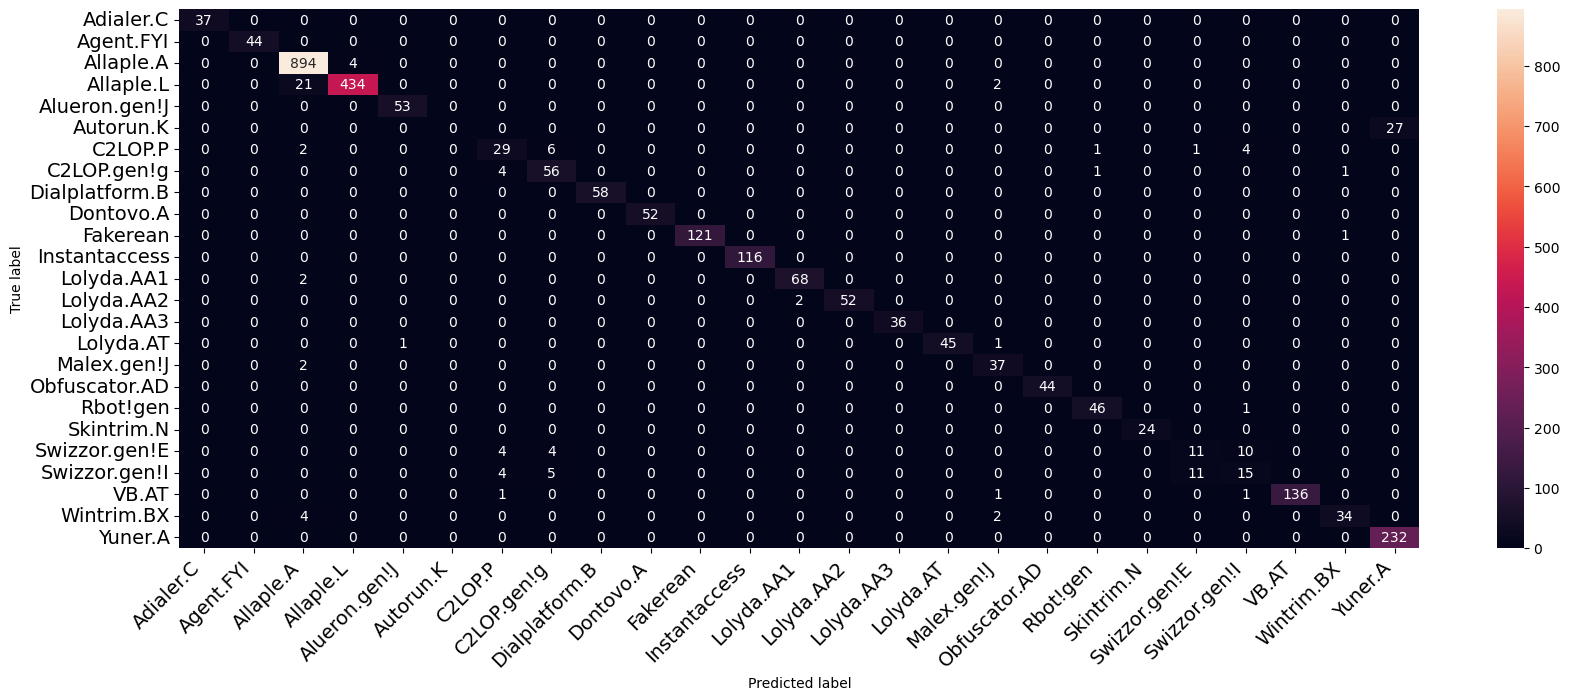

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.

In [84]:
results = pd.DataFrame({ 'CNN Model': 'Malware model',    
    'Accuracy': [scores[1]],
    'Loss': [scores[0]],
    'Precision': [scores[3]],
    'Recall' : [scores[4]],
    'f1 score': [scores[2]]})

In [85]:
results

,CNN Model,Accuracy,Loss,Precision,Recall,f1 score
0,Malware model,0.953035,0.015005,0.951349,0.995872,0.954786


In [86]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)
print(classification_report(Y_test, y_pred))

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35
           2       0.97      0.99      0.98       841
           3       1.00      0.94      0.97       481
           4       0.97      1.00      0.99        67
           5       0.00      0.00      0.00        27
           6       0.70      0.70      0.70        44
           7       0.84      0.87      0.86        71
           8       1.00      1.00      1.00        63
           9       1.00      1.00      1.00        42
          10       0.99      0.98      0.99       120
          11       0.99      1.00      1.00       134
          12       0.98      0.94      0.96        62
          13       1.00      0.98      0.99        51
          14       0.98      1.00      0.99        40
          15       0.98      0.98      0.98        44
          16       0.80      0.98      0.8

c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [87]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import load_model
import PIL


In [88]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Definește funcțiile pentru metrici personalizate
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Încarcă modelul cu toate funcțiile personalizate
model = load_model('my_model.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})


In [89]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img("./dataRaw/0ACDbR5M3ZhBJajygTuf.bytes.png")
img = img.resize((64, 64))
plt.imshow(img)
CATEGORIES = ['Adialer.C','Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J','Autorun.K', 'C2LOP.P','C2LOP.gen!g','Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3','Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen','Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']

img = img_to_array(img) 
img = img.reshape( -1,64, 64,3)
#print(img)
print(img.shape)
#model.summary()
prediction = model.predict(img)
pred_name = CATEGORIES[np.argmax(prediction)]
print(pred_name)
print(prediction)

FileNotFoundError: [Errno 2] No such file or directory: './dataRaw/0ACDbR5M3ZhBJajygTuf.bytes.png'